In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pickle

# Parsing

In [ ]:
# ./compute 250000000 8 8 2097152 0 > a_0.txt
# ./compute 250000000 8 8 2097152 0.99 > a_0.99.txt
# ./compute 250000000 8 8 2097152 0.9 > a_0.9.txt

In [2]:
def parse_file(file_name):
    with open(file_name, "r") as fp:
        ht_num_pages = int(fp.readline())
        log_num_pages = int(fp.readline())
        ht_exp = list()
        log_exp = list()
        for i in range(ht_num_pages):
            ht_exp.append(float(fp.readline()))
            if i % 10000 == 0:
                print(f"{i + 1}/{ht_num_pages} ({100 * (i + 1) / ht_num_pages:.2f}%)\r", end="")
        print(f"{ht_num_pages}/{ht_num_pages} (100.00%)")
        for i in range(log_num_pages):
            log_exp.append(float(fp.readline()))
            if i % 10000 == 0:
                print(f"{i + 1}/{log_num_pages} ({100 * (i + 1) / log_num_pages:.2f}%)\r", end="")
        print(f"{log_num_pages}/{log_num_pages} (100.00%)")
    ht_exp_arr = np.array(ht_exp)
    ht_exp_arr = ht_exp_arr / np.sum(ht_exp_arr)
    log_exp_arr = np.array(log_exp)
    log_exp_arr = log_exp_arr / np.sum(log_exp_arr)
    return (ht_exp_arr, log_exp_arr)

def get_cdf(data):
    arr = np.sort(data)
    index = np.arange(arr.shape[0]) / arr.shape[0]
    return index, arr

def get_zipfian(num, a):
    pmf = 1 / (np.arange(1, num + 1) ** a)
    pmf = pmf / np.sum(pmf)
    return pmf

In [200]:
# zipfian_9 = get_zipfian(250000000, 0.9)
# zipfian_99 = get_zipfian(250000000, 0.99)

# zipfian_9_x, zipfian_9_y = get_cdf(zipfian_9)
# zipfian_99_x, zipfian_99_y = get_cdf(zipfian_99)

In [8]:
exp_dict = dict()

exp_dict["8B Value, 2MB Page, Uniform"] = parse_file("build/a_0.txt")
exp_dict["8B Value, 2MB Page, Zipfian 0.9"] = parse_file("build/a_0.9.txt")
exp_dict["8B Value, 2MB Page, Zipfian 0.99"] = parse_file("build/a_0.99.txt")

exp_dict["8B Value, 4KB Page, Uniform"] = parse_file("build/a_0_4KB.txt")
exp_dict["8B Value, 4KB Page, Zipfian 0.9"] = parse_file("build/a_0.9_4KB.txt")
exp_dict["8B Value, 4KB Page, Zipfian 0.99"] = parse_file("build/a_0.99_4KB.txt")

exp_dict["8B Value, 64B Page, Uniform"] = parse_file("build/a_0_64B.txt")
exp_dict["8B Value, 64B Page, Zipfian 0.9"] = parse_file("build/a_0.9_64B.txt")
exp_dict["8B Value, 64B Page, Zipfian 0.99"] = parse_file("build/a_0.99_64B.txt")


# exp_dict["8B Value, Uniform"] = parse_file("build/a_0_v8.txt")
# exp_dict["8B Value, Zipfian 0.9"] = parse_file("build/a_0.9_v8.txt")
# exp_dict["8B Value, Zipfian 0.99"] = parse_file("build/a_0.99_v8.txt")

# exp_dict["256B Value, Uniform"] = parse_file("build/a_0_v256.txt")
# exp_dict["256B Value, Zipfian 0.9"] = parse_file("build/a_0.9_v256.txt")
# exp_dict["256B Value, Zipfian 0.99"] = parse_file("build/a_0.99_v256.txt")

# exp_dict["4096B Value, Uniform"] = parse_file("build/a_0_v4096.txt")
# exp_dict["4096B Value, Zipfian 0.9"] = parse_file("build/a_0.9_v4096.txt")
# exp_dict["4096B Value, Zipfian 0.99"] = parse_file("build/a_0.99_v4096.txt")

# exp_dict["2097152B Value, Uniform"] = parse_file("build/a_0_v2097152.txt")
# exp_dict["2097152B Value, Zipfian 0.9"] = parse_file("build/a_0.9_v2097152.txt")
# exp_dict["2097152B Value, Zipfian 0.99"] = parse_file("build/a_0.99_v2097152.txt")

4096/4096 (100.00%)
2862/2862 (100.00%)
4096/4096 (100.00%)
2862/2862 (100.00%)
4096/4096 (100.00%)
2862/2862 (100.00%)
2097152/2097152 (100.00%)
1464845/1464845 (100.00%)
2097152/2097152 (100.00%)
1464845/1464845 (100.00%)
2097152/2097152 (100.00%)
1464845/1464845 (100.00%)
134217728/134217728 (100.00%)
93750023/93750023 (100.00%)
134217728/134217728 (100.00%)
93750023/93750023 (100.00%)
134217728/134217728 (100.00%)
93750023/93750023 (100.00%)


In [23]:
for config in exp_dict:
    if "2MB Page" in config:
        page_size = 2097152
    elif "4KB Page" in config:
        page_size = 4096
    elif "64B Page" in config:
        page_size = 64
    else:
        assert False
    ht_exp, log_exp = exp_dict[config]
    cat_exp = np.concatenate((ht_exp, log_exp), axis=0)
    cat_exp.sort()
    cat_exp = cat_exp[:-int(85.5 * 2 ** 20 / page_size)]
    print(f"{config}:")
    for dram_size in [13, 12, 11, 10, 9, 8, 7, 6, 5]:
        num_pages = (dram_size * 2 ** 30) // page_size
        miss_ratio = np.sum(cat_exp[0:cat_exp.shape[0] - num_pages]) / np.sum(cat_exp)
        print(f"\t{dram_size} GB: {miss_ratio}")

8B Value, 2MB Page, Uniform:
	13 GB: 0.03179768812932876
	12 GB: 0.0946531836965724
	11 GB: 0.15751553155991252
	10 GB: 0.2204268105796766
	9 GB: 0.2834282574345492
	8 GB: 0.3464636998178062
	7 GB: 0.4095034195973033
	6 GB: 0.47254698963785313
	5 GB: 0.5492992016936737
8B Value, 2MB Page, Zipfian 0.9:
	13 GB: 0.024469291773234963
	12 GB: 0.07528763468118022
	11 GB: 0.12807526029644675
	10 GB: 0.18286552088507121
	9 GB: 0.2397161644534073
	8 GB: 0.2993471699396355
	7 GB: 0.3634750051382465
	6 GB: 0.43434778665248813
	5 GB: 0.5094921395620325
8B Value, 2MB Page, Zipfian 0.99:
	13 GB: 0.01957125934041789
	12 GB: 0.06139168433924724
	11 GB: 0.10595078527560398
	10 GB: 0.15335307158485859
	9 GB: 0.20384207241467212
	8 GB: 0.25849773770602463
	7 GB: 0.31750000403344253
	6 GB: 0.380567130430269
	5 GB: 0.4477804804588269
8B Value, 4KB Page, Uniform:
	13 GB: 0.03024877500987231
	12 GB: 0.09131206040921745
	11 GB: 0.1531727605596942
	10 GB: 0.2156186033833164
	9 GB: 0.2785960291728436
	8 GB: 0.3

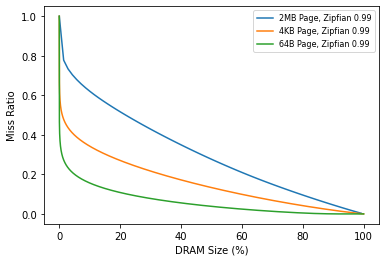

In [20]:
for config in exp_dict:
#     if "Zipfian 0.9" not in config or "0.99" in config:
#         continue
    if "Zipfian 0.99" not in config:
        continue
    if "2MB Page" in config:
        page_size = 2097152
    elif "4KB Page" in config:
        page_size = 4096
    elif "64B Page" in config:
        page_size = 64
    else:
        assert False
    ht_exp, log_exp = exp_dict[config]
    cat_exp = np.concatenate((ht_exp, log_exp), axis=0)
    cat_exp.sort()
#     cat_exp = cat_exp[:-int(85.5 * 2 ** 20 / page_size)]
    cumsum = cat_exp.cumsum()[::-1] / np.sum(cat_exp)
    plt.plot(100 * np.arange(cat_exp.shape[0])[::100] / cat_exp.shape[0], cumsum[::100], label=config[10:])
plt.legend(fontsize=8)
plt.xlabel("DRAM Size (%)")
plt.ylabel("Miss Ratio")
plt.savefig("tmp.pdf")

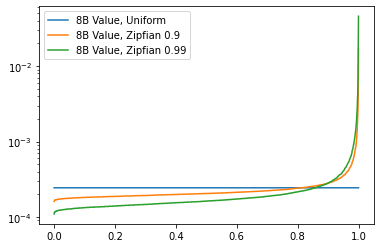

In [180]:
for config in exp_dict:
    ht_exp, log_exp = exp_dict[config]
    x, y = get_cdf(ht_exp)
    plt.plot(x, y, label=config)
plt.yscale('log')
plt.legend()

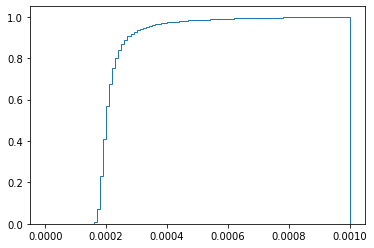

In [133]:
x, y, _ = plt.hist(ht_exp, range=(0, 0.001), bins=100, cumulative=True, density=True, histtype='step')

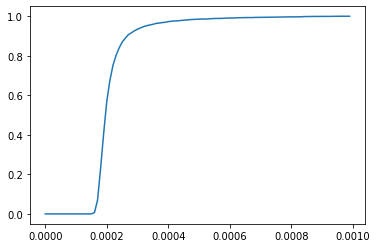

In [136]:
plt.plot(y[:-1], x)

In [117]:
ht_num_pages

4096

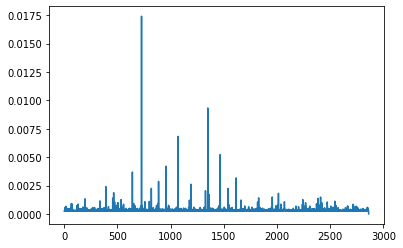

In [118]:
plt.plot(log_exp)

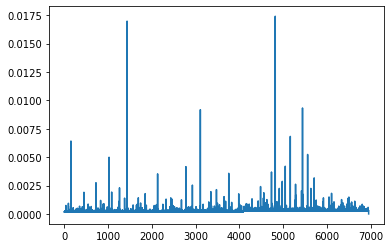

In [121]:
plt.plot(ht_exp + log_exp)

# Python Implementation

In [1]:
def rotr64(x, n):
    return ((x >> n) | (x << (64 - n))) & 0xffffffffffffffff

def key_hash(key):
    local_rand = key
    local_rand_hash = 8
    local_rand_hash = 40343 * local_rand_hash + ((local_rand) & 0xffff)
    local_rand_hash = 40343 * local_rand_hash + ((local_rand >> 16) & 0xffff)
    local_rand_hash = 40343 * local_rand_hash + ((local_rand >> 32) & 0xffff)
    local_rand_hash = 40343 * local_rand_hash + ((local_rand >> 48) & 0xffff)
    local_rand_hash = 40343 * local_rand_hash
    return rotr64(local_rand_hash & 0xffffffffffffffff, 43)


In [3]:
def pad_alignment(size, alignment):
    return ((size + alignment - 1) // alignment) * alignment

def get_record_size(key_size, value_size):
    # alignof(RecordInfo): 8
    # alignof(key_t): 8
    # alignof(value_t): 8 (regardless of the value size)
    # if key_size = 8 and value_size = 8, then record_size should be 24
    record_info_size = 8
    return pad_alignment(value_size
                         + pad_alignment(key_size
                                         + pad_alignment(record_info_size, 8), 8), 8)


In [91]:
# Simulate per-page access distribution based on memory layout
#
# Assumptions:
# * Objects are randomly distributed in the log
#   (Not necessarily follow the same pattern as pmem_bench)
# * Hash buckets never overflow
# * Treat multiple consecutive accesses in one cacheline as one access
# * Only consider major memory accesses in the lookup/update path
# * Does not consider CPU cache

def get_page_exp(obj_pmf, key_size, value_size, page_size=2 ** 21, seed=0xbeef):
    assert value_size <= 2 * 2 ** 20
    num_keys = obj_pmf.shape[0]
    num_buckets = 2 ** math.ceil(math.log((num_keys / 2), 2))
    record_size = get_record_size(key_size, value_size)
    
    # Each bucket is 64 B
    hash_table_size = num_buckets * 64
    
    log_size = 0
    log_mapping = dict()
    # Each log slot is 32 MB
    log_slot_size = 32 * 2 ** 20
    
    print("Simulating loading...")
    obj_load_idx = [i for i in range(num_keys)]
    random.seed(seed)
    random.shuffle(obj_load_idx)
    for prog, obj_idx in enumerate(obj_load_idx):
        local_slot_offset = log_size % log_slot_size
        if local_slot_offset + record_size > log_slot_size:
            # No enough free space in the current log slot,
            # so move on to the next log slot
            log_size += log_slot_size - local_slot_offset
        log_mapping[obj_idx] = log_size
        log_size += record_size
        if prog % 10000 == 0:
            print(f"\tProgress: {prog + 1}/{num_keys} ({100 * (prog + 1) / num_keys:.2f}%)\r", end="")
    print(f"\tProgress: {num_keys}/{num_keys} (100.00%)")
    
    hash_table_num_pages = (hash_table_size + page_size - 1) // page_size
    hash_table_page_exp_num_acc = np.zeros(shape=(hash_table_num_pages,), dtype=np.float)
    log_num_pages = (log_size + page_size - 1) // page_size
    log_page_exp_num_acc = np.zeros(shape=(log_num_pages,), dtype=np.float)
    
    print("Calculating page-level distribution...")
    for obj_idx in range(num_keys):
        obj_pm = obj_pmf[obj_idx]
        hash_bucket = key_hash(obj_idx) % num_buckets
        hash_table_page = (hash_bucket * 64) // page_size
        hash_table_page_exp_num_acc[hash_table_page] += obj_pm
        
        log_addr = log_mapping[obj_idx]
        log_page = log_addr // page_size
        log_page_exp_num_acc[log_page] += obj_pm
        if (log_addr + record_size - 1) // page_size != log_page:
            log_page_exp_num_acc[log_page + 1] += obj_pm
        
        if obj_idx % 10000 == 0:
            print(f"\tProgress: {obj_idx + 1}/{num_keys} ({100 * (obj_idx + 1) / num_keys:.2f}%)\r", end="")
    print(f"\tProgress: {num_keys}/{num_keys} (100.00%)")
    
    return (hash_table_page_exp_num_acc, log_page_exp_num_acc)

In [92]:
num_keys = 25000000
key_size = 8
value_size = 8

obj_pmf = np.ones(shape=(num_keys,), dtype=np.float) * (1 / num_keys)

# a = 0.9
# obj_pmf = np.array([1 / (i ** a) for i in range(1, num_keys + 1)])
# obj_pmf = obj_pmf / np.sum(obj_pmf)
# np.random.seed(0xee)
# np.random.shuffle(obj_pmf)

ht_exp, log_exp = get_page_exp(obj_pmf, key_size, value_size)

Simulating loading...
	Progress: 25000000/25000000 (100.00%)
Calculating page-level distribution...
	Progress: 25000000/25000000 (100.00%)


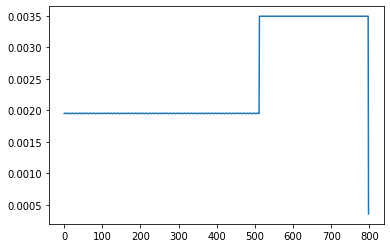

In [93]:
plt.plot(np.concatenate((ht_exp, log_exp), axis=0))

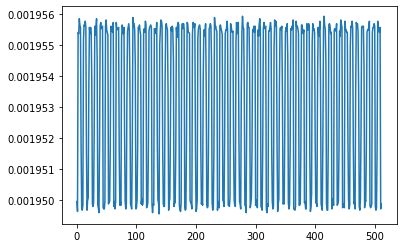

In [94]:
plt.plot(ht_exp)

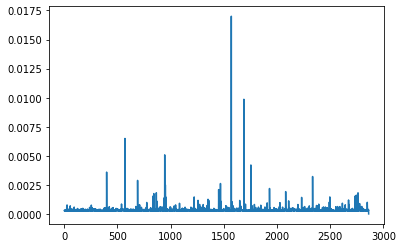

In [65]:
plt.plot(log_exp)

In [68]:
log_exp.shape

(2862,)